> **Name: Shriya Bhat**
<br>
**Section: A1**
<br>
**Registration Number: 220968020**
<br>
**Week: 5**<br>
File 3 <br>
Job Offers dataset - `Decision Tree`
<br>
Heart Disease dataset - `Decision Tree`
<br> 
Bands dataset - `Decision Tree`

### Required Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

### Tasks

_`sklearn` does not support categorical data for finding random forest, we one hot encode the data so that it becomes numeric.<br>_

### 2) Job Offers Data

- Import the dataset.

In [15]:
job_data: pd.DataFrame = pd.read_csv(
    r"..\Datasets\Week5\job_offers.csv",
    dtype="category"
)
job_data

,CGPA,Interactive,Practical Knowledge,Skills,Job Offer
0,>=9,Yes,Very good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very good,Good,Yes
8,>=8,Yes,Good,Good,Yes
9,>=8,Yes,Average,Good,Yes


- One hot encode the data to make it numeric.

In [16]:
job_coded: pd.DataFrame = pd.get_dummies(job_data, columns=[i for i in job_data.columns if i != "Job Offer"])
job_coded

,Job Offer,CGPA_<8,CGPA_>=8,CGPA_>=9,Interactive_No,Interactive_Yes,Practical Knowledge_Average,Practical Knowledge_Good,Practical Knowledge_Very good,Skills_Good,Skills_Moderate,Skills_Poor
0,Yes,False,False,True,False,True,False,False,True,True,False,False
1,Yes,False,True,False,True,False,False,True,False,False,True,False
2,No,False,False,True,True,False,True,False,False,False,False,True
3,No,True,False,False,True,False,True,False,False,True,False,False
4,Yes,False,True,False,False,True,False,True,False,False,True,False
5,Yes,False,False,True,False,True,False,True,False,False,True,False
6,No,True,False,False,False,True,False,True,False,False,False,True
7,Yes,False,False,True,True,False,False,False,True,True,False,False
8,Yes,False,True,False,False,True,False,True,False,True,False,False
9,Yes,False,True,False,False,True,True,False,False,True,False,False


- Define feature vector and target variable.

*Feature vector:*

In [17]:
x: pd.DataFrame = job_coded.iloc[:, 1:]

*Target Variable:*

In [18]:
y: pd.Series = job_coded["Job Offer"]

- Create training and testing splits.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

*Training data:*

In [20]:
pd.concat([x_train, y_train], axis=1)

,CGPA_<8,CGPA_>=8,CGPA_>=9,Interactive_No,Interactive_Yes,Practical Knowledge_Average,Practical Knowledge_Good,Practical Knowledge_Very good,Skills_Good,Skills_Moderate,Skills_Poor,Job Offer
0,False,False,True,False,True,False,False,True,True,False,False,Yes
7,False,False,True,True,False,False,False,True,True,False,False,Yes
2,False,False,True,True,False,True,False,False,False,False,True,No
9,False,True,False,False,True,True,False,False,True,False,False,Yes
4,False,True,False,False,True,False,True,False,False,True,False,Yes
3,True,False,False,True,False,True,False,False,True,False,False,No
6,True,False,False,False,True,False,True,False,False,False,True,No


*Testing data:*

In [21]:
pd.concat([x_test, y_test], axis=1)

,CGPA_<8,CGPA_>=8,CGPA_>=9,Interactive_No,Interactive_Yes,Practical Knowledge_Average,Practical Knowledge_Good,Practical Knowledge_Very good,Skills_Good,Skills_Moderate,Skills_Poor,Job Offer
8,False,True,False,False,True,False,True,False,True,False,False,Yes
1,False,True,False,True,False,False,True,False,False,True,False,Yes
5,False,False,True,False,True,False,True,False,False,True,False,Yes


- Create classifier.

In [22]:
model: DecisionTreeClassifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
model

DecisionTreeClassifier(criterion='entropy', random_state=42)

- Fit the model.

In [23]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

- Plot the tree.

*Using `sklearn.tree.plot_tree`:*

[Text(0.6, 0.8333333333333334, 'Skills_Poor <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]\nclass = No'),
 Text(0.4, 0.5, 'CGPA_<8 <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = No'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Yes')]

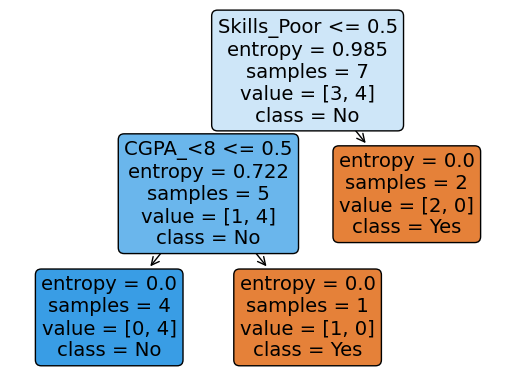

In [24]:
plot_tree(
    model,
    feature_names=x.columns,
    class_names=y.unique(),
    rounded=True,
    filled=True
)

*Using `sklearn.tree.export_graphviz`:*

In [25]:
with open(r"Generated/job_dt.txt", "x") as file:
    content: str = export_graphviz(
        model,
        feature_names=x.columns,
        class_names=y.unique(),
        rounded=True,
        filled=True
    )
    file.write(content)
    print(content)
    file.close()

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Skills_Poor <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]\nclass = No", fillcolor="#cee6f8"] ;
1 [label="CGPA_<8 <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = No", fillcolor="#6ab6ec"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No", fillcolor="#399de5"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes", fillcolor="#e58139"] ;
1 -> 3 ;
4 [label="entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Yes", fillcolor="#e58139"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


- Predict values for test set.

In [26]:
temp_data: pd.DataFrame = job_data.loc[x_test.index, :]
temp_data["Predicted_Class"] = model.predict(x_test)

temp_data

,CGPA,Interactive,Practical Knowledge,Skills,Job Offer,Predicted_Class
8,>=8,Yes,Good,Good,Yes,Yes
1,>=8,No,Good,Moderate,Yes,Yes
5,>=9,Yes,Good,Moderate,Yes,Yes


- Find accuracy score.

In [27]:
accuracy_score(y_test, temp_data["Predicted_Class"])

1.0

### 3) Heart Disease Data

- Import the dataset.

In [28]:
heart_data: pd.DataFrame = pd.read_csv(
    r"..\Datasets\Week5\RF_Dataset1_heart_v2.csv",
    dtype={"sex": "category", "heart disease": "category"}
)
heart_data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


*All data is numeric, no need for one hot encoding.*

- Define feature vector and target variable.

*Feature vector:*

In [29]:
x: pd.DataFrame = heart_data.iloc[:, :-1]

*Target Variable:*

In [30]:
y: pd.Series = heart_data.iloc[:, -1]

- Create training and testing splits.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

*Training data:*

In [32]:
pd.concat([x_train, y_train], axis=1)

,age,sex,BP,cholestrol,heart disease
84,57,1,110,201,0
251,44,1,130,219,0
92,54,1,124,266,1
201,58,1,125,300,1
126,62,1,120,267,1
...,...,...,...,...,...
20,67,1,120,229,1
188,62,0,140,394,0
71,57,0,120,354,0
106,51,1,100,222,0


*Testing data:*

In [33]:
pd.concat([x_test, y_test], axis=1)

,age,sex,BP,cholestrol,heart disease
30,57,1,128,229,1
116,46,1,120,249,1
79,56,1,120,236,0
127,52,0,136,196,0
196,58,0,100,248,0
...,...,...,...,...,...
55,41,0,105,198,0
97,58,1,100,234,1
200,68,1,118,277,0
38,42,1,130,180,0


- Create classifier.

In [34]:
model: DecisionTreeClassifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
model

DecisionTreeClassifier(criterion='entropy', random_state=42)

- Fit the model.

In [35]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

- Plot the tree.

*Using `sklearn.tree.plot_tree`:*

[Text(0.40594594594594596, 0.9642857142857143, 'age <= 54.5\nentropy = 0.997\nsamples = 189\nvalue = [101, 88]\nclass = 1'),
 Text(0.06918918918918919, 0.8928571428571429, 'sex <= 0.5\nentropy = 0.876\nsamples = 88\nvalue = [62, 26]\nclass = 1'),
 Text(0.034594594594594595, 0.8214285714285714, 'cholestrol <= 300.0\nentropy = 0.276\nsamples = 21\nvalue = [20, 1]\nclass = 1'),
 Text(0.017297297297297298, 0.75, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = 1'),
 Text(0.05189189189189189, 0.75, 'BP <= 128.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 1'),
 Text(0.034594594594594595, 0.6785714285714286, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 1'),
 Text(0.06918918918918919, 0.6785714285714286, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 0'),
 Text(0.10378378378378378, 0.8214285714285714, 'cholestrol <= 179.5\nentropy = 0.953\nsamples = 67\nvalue = [42, 25]\nclass = 1'),
 Text(0.08648648648648649, 0.75, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclas

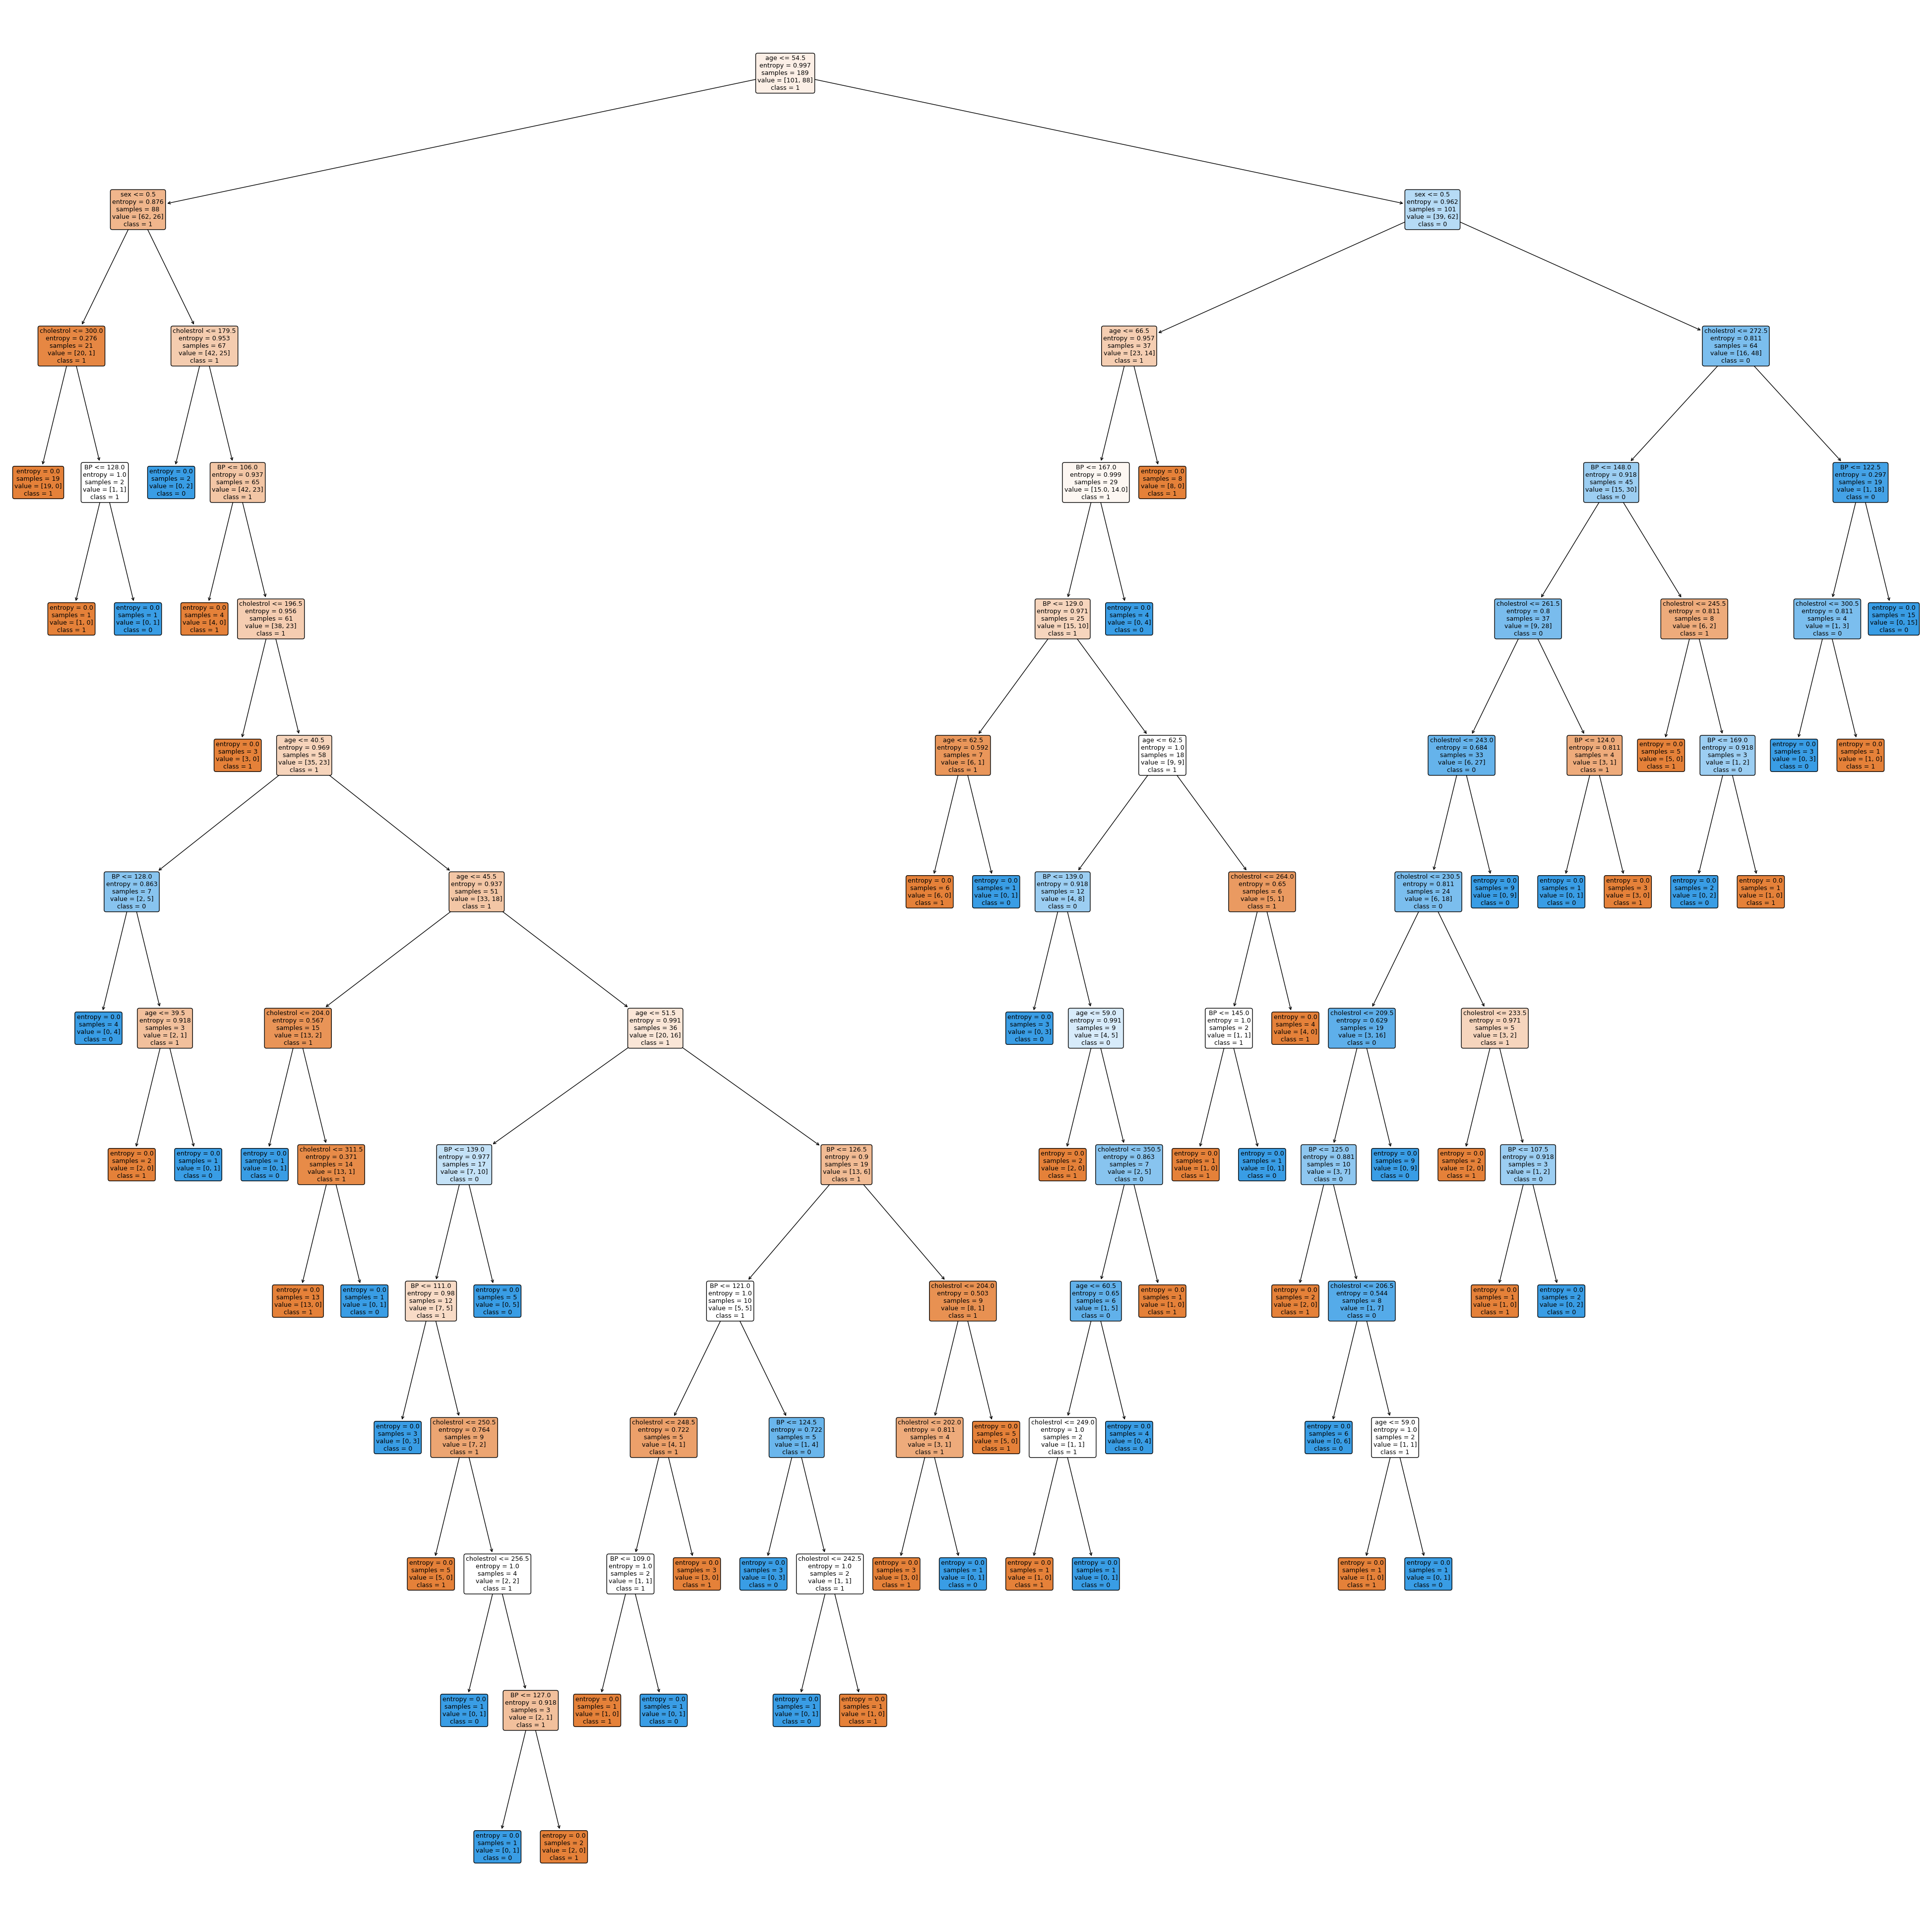

In [36]:
plt.figure(figsize=(50, 50))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=y.unique(),
    rounded=True,
    filled=True
)

*Using `sklearn.tree.export_graphviz`:*

In [37]:
with open(r"Generated/heart_dt.txt", "x") as file:
    content: str = export_graphviz(
        model,
        feature_names=x.columns,
        class_names=y.unique(),
        rounded=True,
        filled=True
    )
    file.write(content)
    print(content)
    file.close()

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="age <= 54.5\nentropy = 0.997\nsamples = 189\nvalue = [101, 88]\nclass = 1", fillcolor="#fcefe6"] ;
1 [label="sex <= 0.5\nentropy = 0.876\nsamples = 88\nvalue = [62, 26]\nclass = 1", fillcolor="#f0b68c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="cholestrol <= 300.0\nentropy = 0.276\nsamples = 21\nvalue = [20, 1]\nclass = 1", fillcolor="#e68743"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = 1", fillcolor="#e58139"] ;
2 -> 3 ;
4 [label="BP <= 128.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 1", fillcolor="#ffffff"] ;
2 -> 4 ;
5 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 1", fillcolor="#e58139"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 0", fillcolor="#399de5"] ;
4 -> 6 ;
7 [label="cholestrol <= 179.5\nentropy = 0.953\nsamples = 67\nvalue

- Predict values for test set.

In [38]:
temp_data: pd.DataFrame = heart_data.loc[x_test.index, :]
temp_data["Predicted_Class"] = model.predict(x_test)

temp_data

,age,sex,BP,cholestrol,heart disease,Predicted_Class
30,57,1,128,229,1,1
116,46,1,120,249,1,0
79,56,1,120,236,0,1
127,52,0,136,196,0,0
196,58,0,100,248,0,0
...,...,...,...,...,...,...
55,41,0,105,198,0,0
97,58,1,100,234,1,0
200,68,1,118,277,0,1
38,42,1,130,180,0,0


- Find accuracy score.

In [39]:
accuracy_score(y_test, temp_data["Predicted_Class"])

0.654320987654321

### 4) Cylinder Bands Data

- Import the dataset.

In [40]:
cylinder_data: pd.DataFrame = pd.read_csv(
    r"..\Datasets\Week5\bands.data",
    header=None,
    names=[
        "timestamp",
        "cylinder number",
        "customer",
        "job number",
        "grain screened",
        "ink color",
        "proof on ctd ink",
        "blade mfg",
        "cylinder division",
        "paper type",
        "ink type",
        "direct steam",
        "solvent type",
        "type on cylinder",
        "press type",
        "press",
        "unit number",
        "cylinder size",
        "paper mill location",
        "plating tank",
        "proof cut",
        "viscosity",
        "caliper",
        "ink temperature",
        "humifity",
        "roughness",
        "blade pressure",
        "varnish pct",
        "press speed",
        "ink pct",
        "solvent pct",
        "ESA Voltage",
        "ESA Amperage",
        "wax",
        "hardener",
        "roller durometer", 
        "current density",
        "anode space ratio",
        "chrome content",
        "band type"
    ],
    dtype={"band type": "category"},
    na_values=["?"]
)
cylinder_data

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910108,X126,TVGUIDE,25503.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,band
1,19910109,X266,TVGUIDE,25503.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,noband
2,19910104,B7,MODMAT,47201.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,noband
3,19910104,T133,MASSEY,39039.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,noband
4,19910111,J34,KMART,37351.0,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,aa66,kmart,85813.0,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1.0,1.0,NaN,40.0,112.50,100.0,band
537,19941009,j44,best,38064.0,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,0.0,0.0,NaN,40.0,110.00,100.0,band
538,19941009,aa58,kmart,85814.0,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,2.7,2.8,NaN,40.0,108.00,100.0,band
539,19941010,aa70,kmart,85814.0,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1.5,2.3,NaN,40.0,108.00,100.0,band


**Preprocessing:**

*Drop `timestamp` and `cylinder number` as they have too many distinct values.*

In [41]:
cylinder_data.drop(["timestamp", "cylinder number"], axis=1, inplace=True)
cylinder_data

,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,direct steam,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,TVGUIDE,25503.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,band
1,TVGUIDE,25503.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,noband
2,MODMAT,47201.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,noband
3,MASSEY,39039.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,noband
4,KMART,37351.0,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,kmart,85813.0,NaN,key,NaN,NaN,gallatin,super,uncoated,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,40.0,112.50,100.0,band
537,best,38064.0,NaN,key,NaN,NaN,gallatin,super,coated,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,40.0,110.00,100.0,band
538,kmart,85814.0,NaN,key,NaN,NaN,gallatin,super,coated,NaN,...,NaN,NaN,NaN,2.7,2.8,NaN,40.0,108.00,100.0,band
539,kmart,85814.0,NaN,key,NaN,NaN,gallatin,super,uncoated,NaN,...,NaN,NaN,NaN,1.5,2.3,NaN,40.0,108.00,100.0,band


*Check for missing data.*

In [42]:
cylinder_data.isna().sum()

customer                 0
job number               1
grain screened          49
ink color                0
proof on ctd ink        57
blade mfg               60
cylinder division        0
paper type               0
ink type                 1
direct steam            25
solvent type            56
type on cylinder        19
press type               1
press                    1
unit number              0
cylinder size            4
paper mill location    157
plating tank            19
proof cut               55
viscosity                6
caliper                 28
ink temperature          4
humifity                 3
roughness               32
blade pressure          65
varnish pct             57
press speed             12
ink pct                 57
solvent pct             57
ESA Voltage             58
ESA Amperage            56
wax                      8
hardener                 9
roller durometer        56
current density          9
anode space ratio        9
chrome content           5
b

*Drop missing data.*

In [43]:
cylinder_data.dropna(inplace=True)
cylinder_data.isna().sum()

customer               0
job number             0
grain screened         0
ink color              0
proof on ctd ink       0
blade mfg              0
cylinder division      0
paper type             0
ink type               0
direct steam           0
solvent type           0
type on cylinder       0
press type             0
press                  0
unit number            0
cylinder size          0
paper mill location    0
plating tank           0
proof cut              0
viscosity              0
caliper                0
ink temperature        0
humifity               0
roughness              0
blade pressure         0
varnish pct            0
press speed            0
ink pct                0
solvent pct            0
ESA Voltage            0
ESA Amperage           0
wax                    0
hardener               0
roller durometer       0
current density        0
anode space ratio      0
chrome content         0
band type              0
dtype: int64

- One hot encode the string data to make it numeric.

In [44]:
cylinder_coded: pd.DataFrame = pd.get_dummies(
    cylinder_data,
    columns=cylinder_data.select_dtypes(include="object").columns
)
cylinder_coded

,job number,press,unit number,plating tank,proof cut,viscosity,ink temperature,humifity,roughness,blade pressure,...,caliper_0.267,caliper_0.283,caliper_0.3,caliper_0.333,caliper_0.35,caliper_0.367,caliper_0.4,caliper_0.433,caliper_0.467,caliper_0.5
0,25503.0,821.0,2.0,1911.0,55.0,46.0,17.0,78.0,0.7500,20.0,...,False,False,False,False,False,False,False,False,False,False
3,39039.0,816.0,9.0,1910.0,52.0,40.0,16.0,75.0,0.3125,30.0,...,False,False,True,False,False,False,False,False,False,False
5,38039.0,816.0,2.0,1910.0,50.0,40.0,16.8,76.0,0.4375,28.0,...,True,False,False,False,False,False,False,False,False,False
6,35751.0,827.0,2.0,1911.0,50.0,46.0,16.5,75.0,0.7500,30.0,...,False,False,True,False,False,False,False,False,False,False
7,35751.0,827.0,9.0,1911.0,50.0,46.0,16.5,75.0,0.7500,28.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34590.0,827.0,2.0,1910.0,50.0,40.0,15.0,88.0,0.7500,30.0,...,False,False,False,False,False,False,False,False,False,False
426,34693.0,828.0,9.0,1910.0,50.0,41.0,15.7,80.0,1.0000,43.0,...,False,False,False,False,False,False,False,False,False,False
427,34694.0,824.0,2.0,1910.0,30.0,41.0,15.5,74.0,0.8125,30.0,...,False,False,False,True,False,False,False,False,False,False
428,35525.0,815.0,2.0,1910.0,40.0,41.0,15.5,76.0,0.7500,28.0,...,True,False,False,False,False,False,False,False,False,False


- Define feature vector and target variable.

*Feature vector:*

In [45]:
x: pd.DataFrame = cylinder_coded[[i for i in cylinder_coded.columns if i != "band type"]]

*Target Variable:*

In [46]:
y: pd.Series = cylinder_coded["band type"]

- Create training and testing splits.

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

*Training data:*

In [48]:
pd.concat([x_train, y_train], axis=1)

,job number,press,unit number,plating tank,proof cut,viscosity,ink temperature,humifity,roughness,blade pressure,...,caliper_0.283,caliper_0.3,caliper_0.333,caliper_0.35,caliper_0.367,caliper_0.4,caliper_0.433,caliper_0.467,caliper_0.5,band type
56,37869.0,802.0,7.0,1911.0,35.0,38.0,12.0,62.0,0.7500,46.0,...,False,False,False,False,False,True,False,False,False,noband
327,34754.0,824.0,2.0,1910.0,42.5,48.0,16.0,70.0,0.8125,35.0,...,False,False,False,False,False,False,False,False,False,noband
219,36024.0,815.0,9.0,1910.0,52.5,54.0,16.3,90.0,0.7500,38.0,...,False,False,False,False,False,False,True,False,False,noband
97,35754.0,824.0,9.0,1910.0,47.0,43.0,16.0,80.0,0.5625,30.0,...,False,False,False,False,False,False,False,False,False,noband
416,25451.0,821.0,7.0,1910.0,55.0,40.0,15.1,69.0,0.6250,20.0,...,False,True,False,False,False,False,False,False,False,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,34551.0,815.0,1.0,1910.0,40.0,60.0,15.5,73.0,0.7500,28.0,...,False,False,False,False,False,False,False,False,False,band
121,37333.0,815.0,2.0,1910.0,35.0,56.0,15.3,80.0,0.7500,20.0,...,False,True,False,False,False,False,False,False,False,band
165,37199.0,824.0,9.0,1910.0,40.0,64.0,16.5,82.0,0.5625,30.0,...,False,False,False,False,False,False,False,False,False,band
420,34556.0,816.0,9.0,1910.0,37.5,40.0,14.0,80.0,0.2500,24.0,...,False,False,False,False,False,False,False,False,False,noband


*Testing data:*

In [49]:
pd.concat([x_test, y_test], axis=1)

,job number,press,unit number,plating tank,proof cut,viscosity,ink temperature,humifity,roughness,blade pressure,...,caliper_0.283,caliper_0.3,caliper_0.333,caliper_0.35,caliper_0.367,caliper_0.4,caliper_0.433,caliper_0.467,caliper_0.5,band type
47,37441.0,821.0,2.0,1911.0,25.0,38.0,13.0,75.0,0.6250,25.0,...,False,False,False,False,False,False,False,False,False,noband
194,36054.0,827.0,2.0,1910.0,45.0,55.0,15.0,75.0,0.7500,25.0,...,False,True,False,False,False,False,False,False,False,noband
355,36165.0,828.0,2.0,1910.0,65.0,42.0,17.0,80.0,1.0000,22.0,...,False,False,False,False,False,False,False,False,False,noband
218,36057.0,827.0,2.0,1910.0,30.0,58.0,15.0,96.0,0.7500,30.0,...,False,False,False,False,False,False,False,True,False,noband
403,27490.0,802.0,2.0,1910.0,32.0,42.0,16.0,70.0,0.6250,46.0,...,False,False,False,False,False,False,False,False,False,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,35758.0,828.0,2.0,1910.0,40.0,62.0,16.0,84.0,0.9375,32.0,...,False,False,False,False,False,False,False,False,False,noband
272,36644.0,802.0,7.0,1910.0,60.0,53.0,14.7,70.0,0.7500,50.0,...,False,True,False,False,False,False,False,False,False,noband
95,35534.0,827.0,9.0,1910.0,45.0,44.0,15.5,75.0,1.2500,20.0,...,False,True,False,False,False,False,False,False,False,noband
337,36197.0,815.0,9.0,1911.0,47.5,53.0,15.0,72.0,0.7500,25.0,...,False,True,False,False,False,False,False,False,False,band


- Create classifier.

In [50]:
model: DecisionTreeClassifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
model

DecisionTreeClassifier(criterion='entropy', random_state=42)

- Fit the model.

In [51]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

- Plot the tree.

*Using `sklearn.tree.plot_tree`:*

[Text(0.4722222222222222, 0.95, 'roller durometer <= 33.5\nentropy = 0.949\nsamples = 193\nvalue = [71, 122]\nclass = noband'),
 Text(0.2013888888888889, 0.85, 'unit number <= 1.5\nentropy = 0.744\nsamples = 90\nvalue = [19, 71]\nclass = noband'),
 Text(0.14583333333333334, 0.75, 'roughness <= 0.406\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]\nclass = band'),
 Text(0.11805555555555555, 0.65, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = noband'),
 Text(0.1736111111111111, 0.65, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = band'),
 Text(0.2569444444444444, 0.75, 'current density <= 37.5\nentropy = 0.601\nsamples = 82\nvalue = [12, 70]\nclass = noband'),
 Text(0.22916666666666666, 0.65, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = noband'),
 Text(0.2847222222222222, 0.65, 'press type_WoodHoe70 <= 0.5\nentropy = 0.709\nsamples = 62\nvalue = [12, 50]\nclass = noband'),
 Text(0.20833333333333334, 0.55, 'ink type_UNCOATED <= 0.5\nentropy = 0.489\nsamples = 47\nvalu

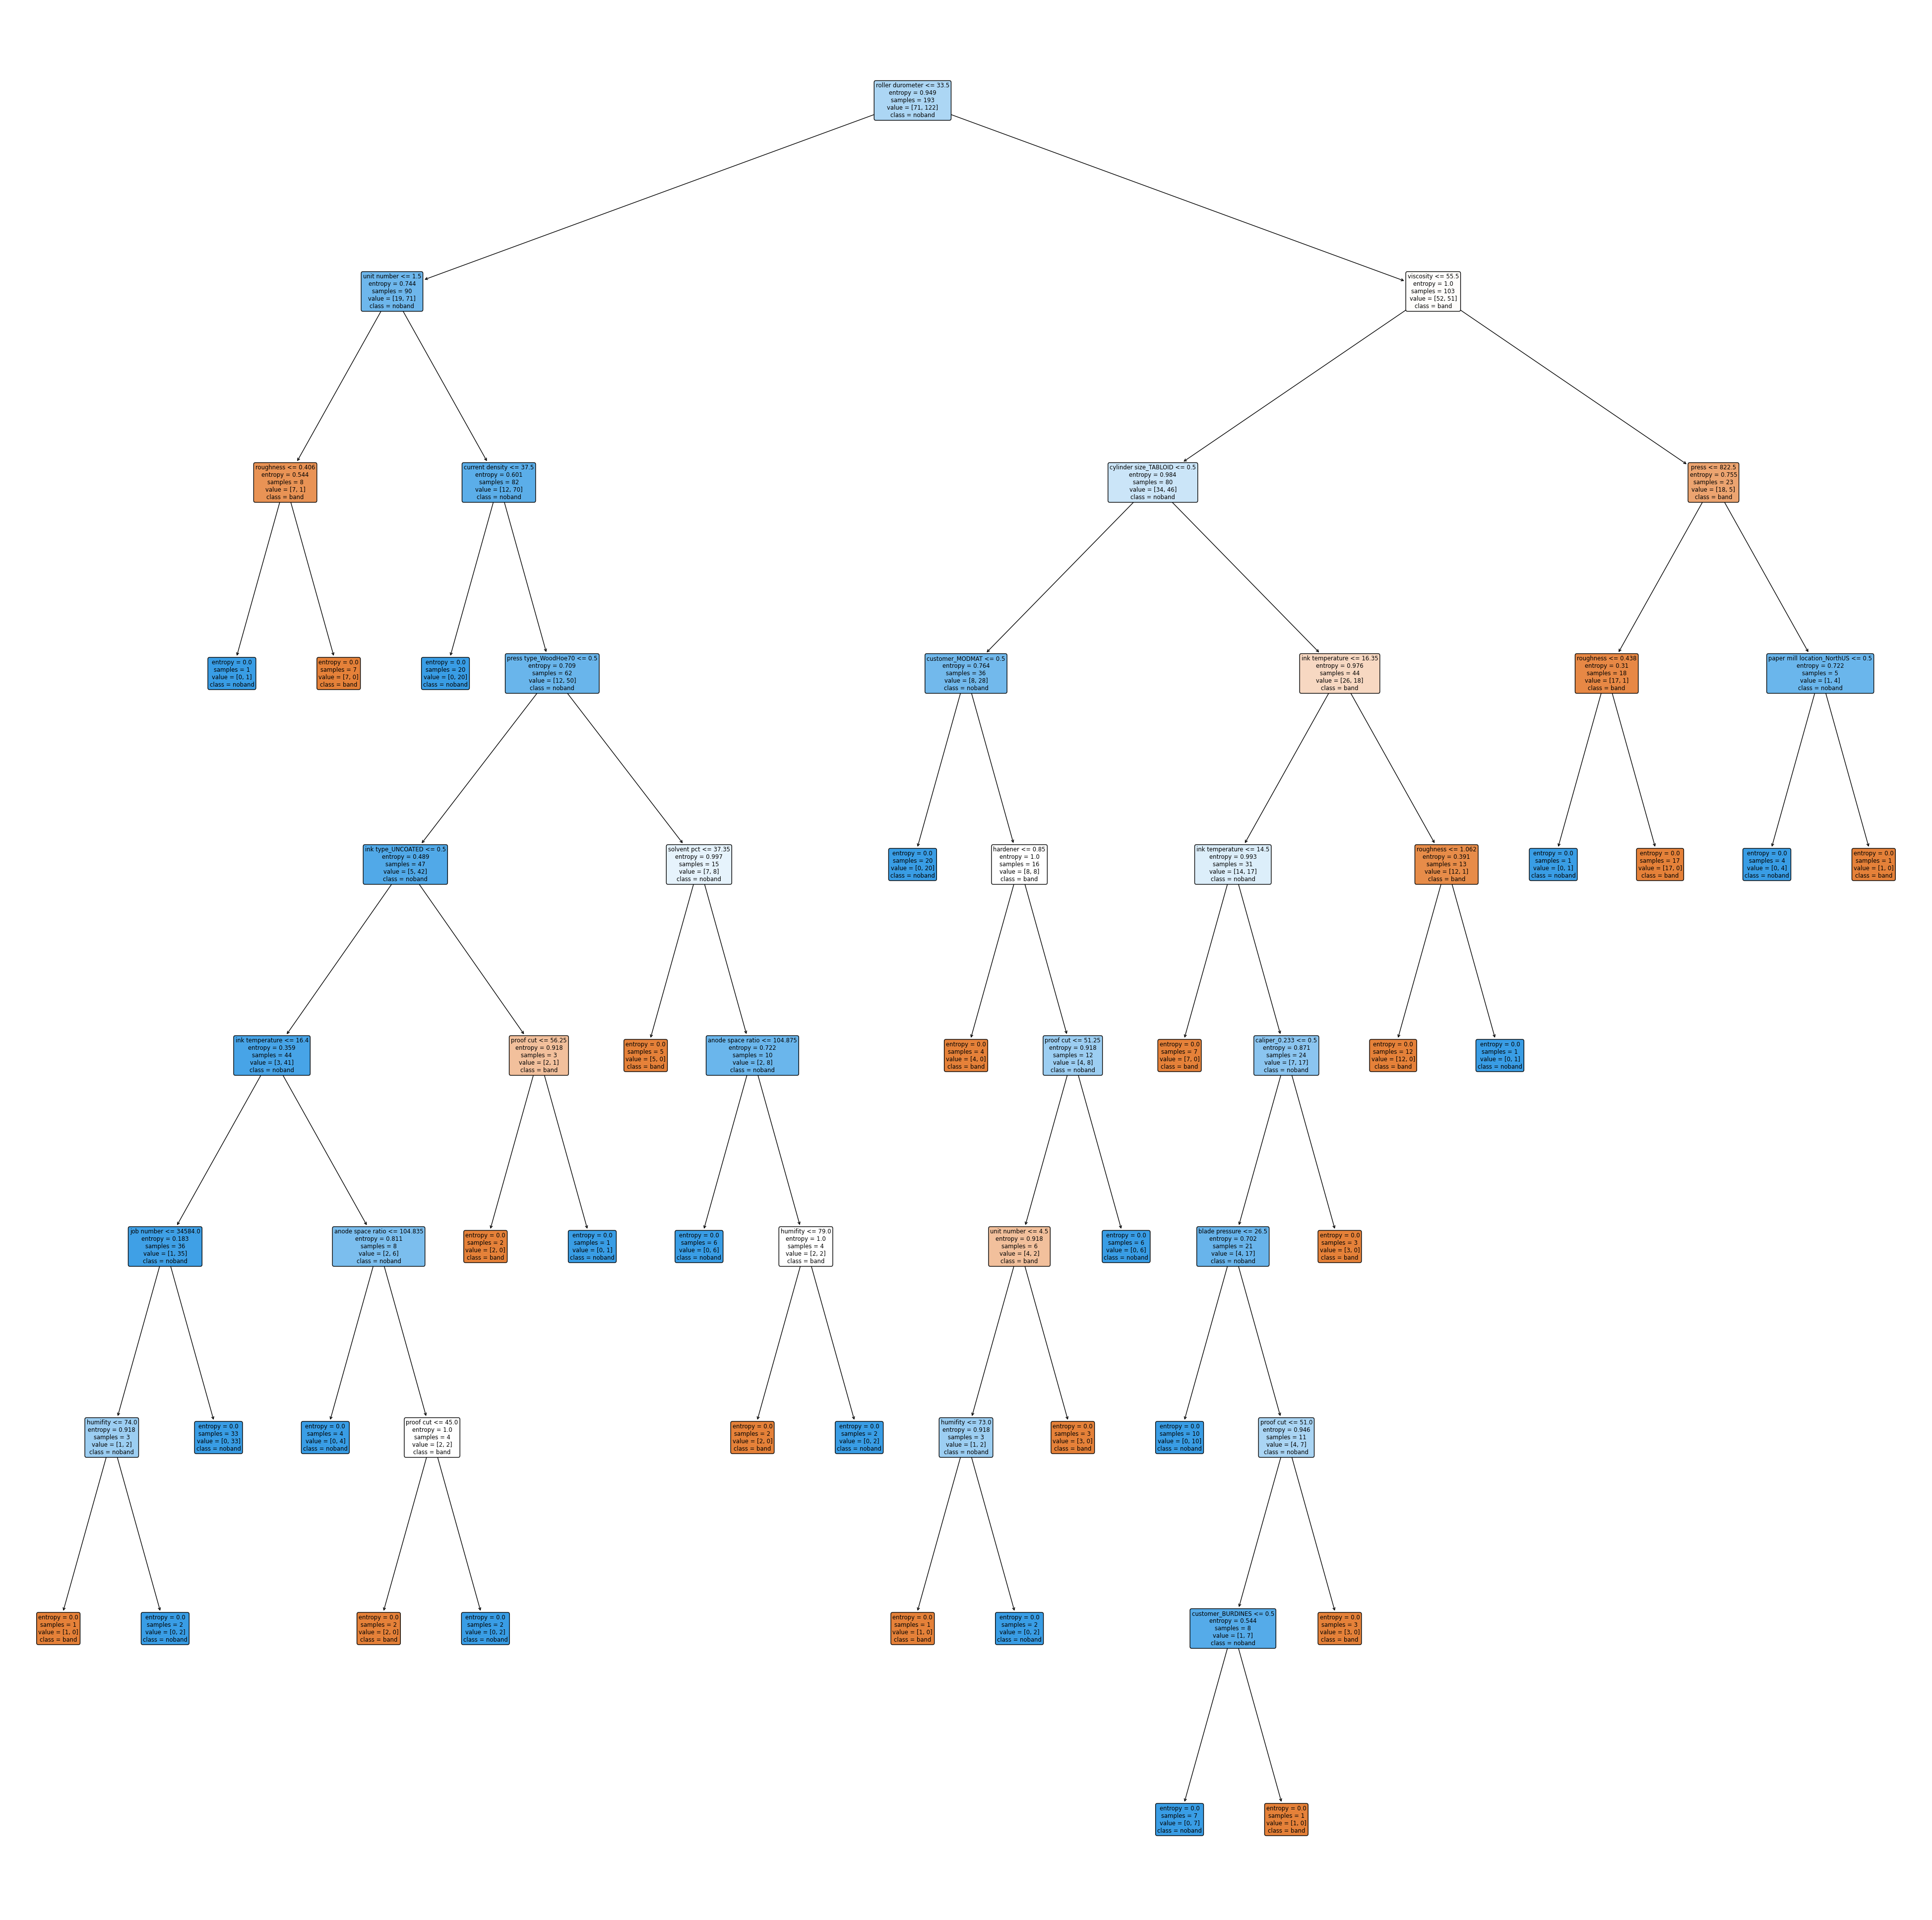

In [52]:
plt.figure(figsize=(50, 50))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=y.unique(),
    rounded=True,
    filled=True
)

*Using `sklearn.tree.export_graphviz`:*

In [53]:
with open(r"Generated/cylinder_dt.txt", "x") as file:
    content: str = export_graphviz(
        model,
        feature_names=x.columns,
        class_names=y.unique(),
        rounded=True,
        filled=True
    )
    file.write(content)
    print(content)
    file.close()

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="roller durometer <= 33.5\nentropy = 0.949\nsamples = 193\nvalue = [71, 122]\nclass = noband", fillcolor="#acd6f4"] ;
1 [label="unit number <= 1.5\nentropy = 0.744\nsamples = 90\nvalue = [19, 71]\nclass = noband", fillcolor="#6eb7ec"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="roughness <= 0.406\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]\nclass = band", fillcolor="#e99355"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = noband", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = band", fillcolor="#e58139"] ;
2 -> 4 ;
5 [label="current density <= 37.5\nentropy = 0.601\nsamples = 82\nvalue = [12, 70]\nclass = noband", fillcolor="#5baee9"] ;
1 -> 5 ;
6 [label="entropy = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = noband", fillcolor="#399de5"] ;
5 -> 6 ;
7

- Predict values for test set.

In [54]:
temp_data: pd.DataFrame = cylinder_data.loc[x_test.index, :]
temp_data["Predicted_Class"] = model.predict(x_test)

temp_data

,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,direct steam,...,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type,Predicted_Class
47,CENPURCH,37441.0,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,...,0.0,0.0,2.5,0.85,30.0,40.0,103.12,100.0,noband,noband
194,WARDS,36054.0,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,...,0.0,0.0,2.0,2.30,30.0,33.0,96.60,100.0,noband,noband
355,KMART,36165.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,...,1.0,0.0,2.5,1.00,40.0,40.0,100.00,100.0,noband,band
218,WARDS,36057.0,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,...,6.0,0.0,3.0,0.75,30.0,35.0,100.00,100.0,noband,noband
403,ABBEYPRESS,27490.0,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,...,0.0,0.0,3.0,1.00,34.0,40.0,100.00,100.0,noband,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,ROSES,35758.0,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,...,4.0,0.0,1.4,1.00,30.0,40.0,106.45,100.0,noband,noband
272,REI,36644.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,...,3.0,0.0,3.0,1.00,40.0,35.0,111.10,100.0,noband,noband
95,BELK,35534.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,...,0.0,0.0,2.5,1.50,40.0,40.0,110.00,100.0,noband,noband
337,KMART,36197.0,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,...,0.0,0.0,2.5,0.80,35.0,40.0,114.30,100.0,band,noband


- Find accuracy score.

In [55]:
accuracy_score(y_test, temp_data["Predicted_Class"])

0.6666666666666666